<a href="https://colab.research.google.com/github/rohitha077/Music-Recommendation-and-Image-Recognition-/blob/main/rohitha7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

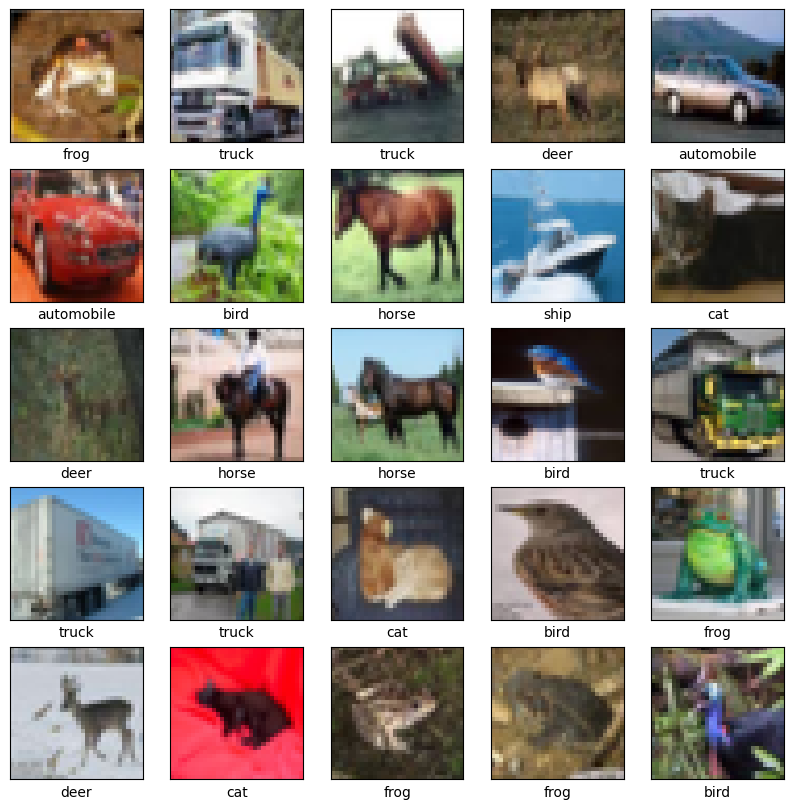

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3500 - loss: 1.7546 - val_accuracy: 0.5475 - val_loss: 1.2497
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5873 - loss: 1.1677 - val_accuracy: 0.6174 - val_loss: 1.0816
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6519 - loss: 0.9906 - val_accuracy: 0.6616 - val_loss: 0.9641
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6891 - loss: 0.8902 - val_accuracy: 0.6800 - val_loss: 0.9189
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7191 - loss: 0.8016 - val_accuracy: 0.6920 - val_loss: 0.8939
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7404 - loss: 0.7368 - val_accuracy: 0.6897 - val_loss: 0.9115
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.7563 - loss: 0.6934 - val_accuracy: 0.6913 - val_loss: 0.9227
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.7772 -

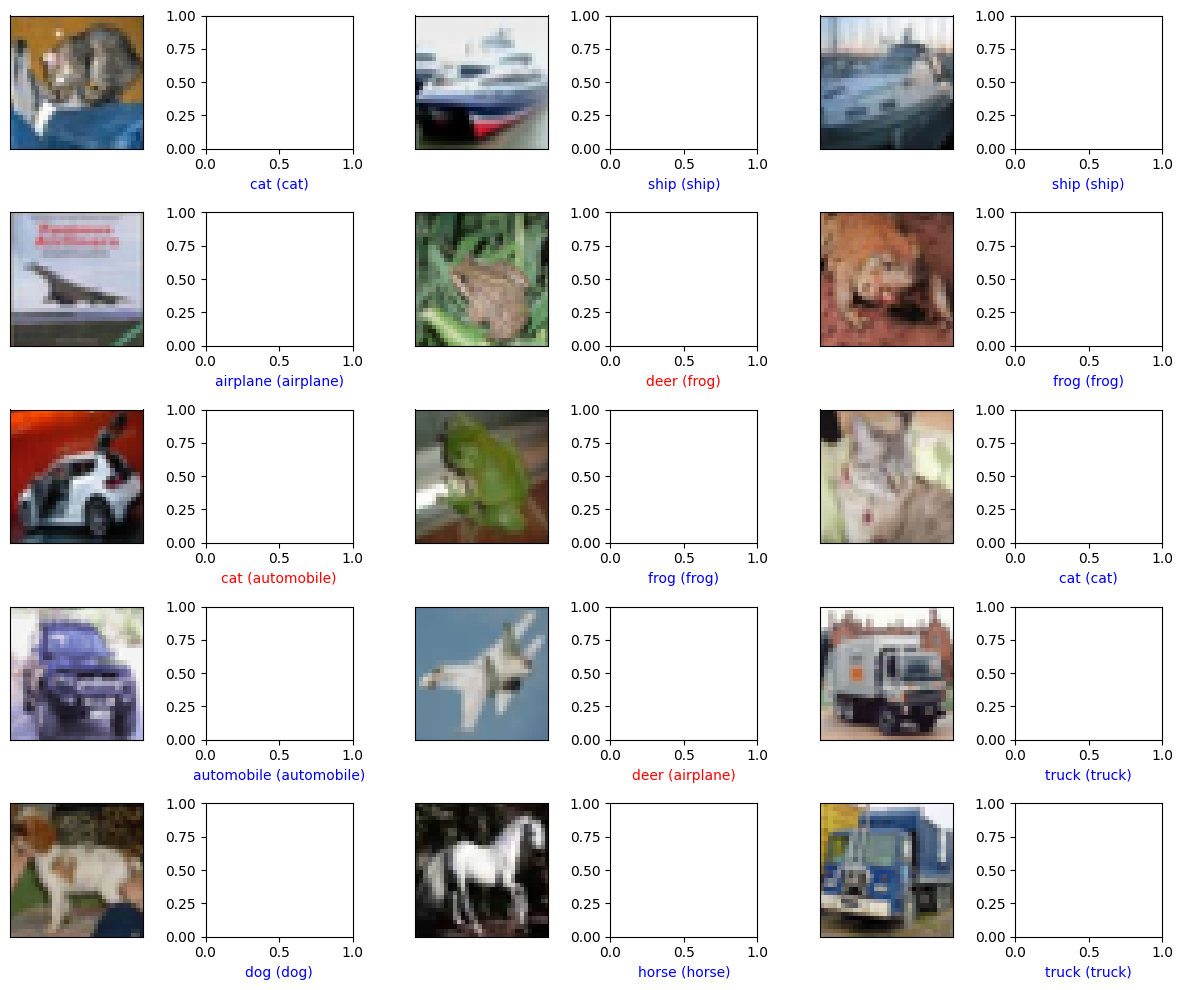

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)
plt.tight_layout()
plt.show()
